## Load the data from Sklearn 

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [2]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Let's split the data into 80-20 For training and spliting 

In [3]:
import numpy as np
def split_Train_Test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_length = int(len(data) * test_ratio)
    test_indices = shuffled[:test_length]
    train_indices = shuffled[test_length:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [4]:
# train_data, test_data = split_Train_Test(boston, 0.2)
# boston = train_data , This does not work here

## Since CRIM have more values related to 0 or less values related to 1 so ,there can be a problem of Stratified Sampling, To solve that
## Problem we can use stratfied sampling

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(boston, boston['CHAS'], boston['B']):
    strat_train_set = boston.iloc[train_index]
    strat_test_set = boston.iloc[test_index]

strat_train_set['CHAS'].value_counts()
boston = strat_train_set.copy()

## Analyze the data 

In [5]:
# Checking for all values are present or not 
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

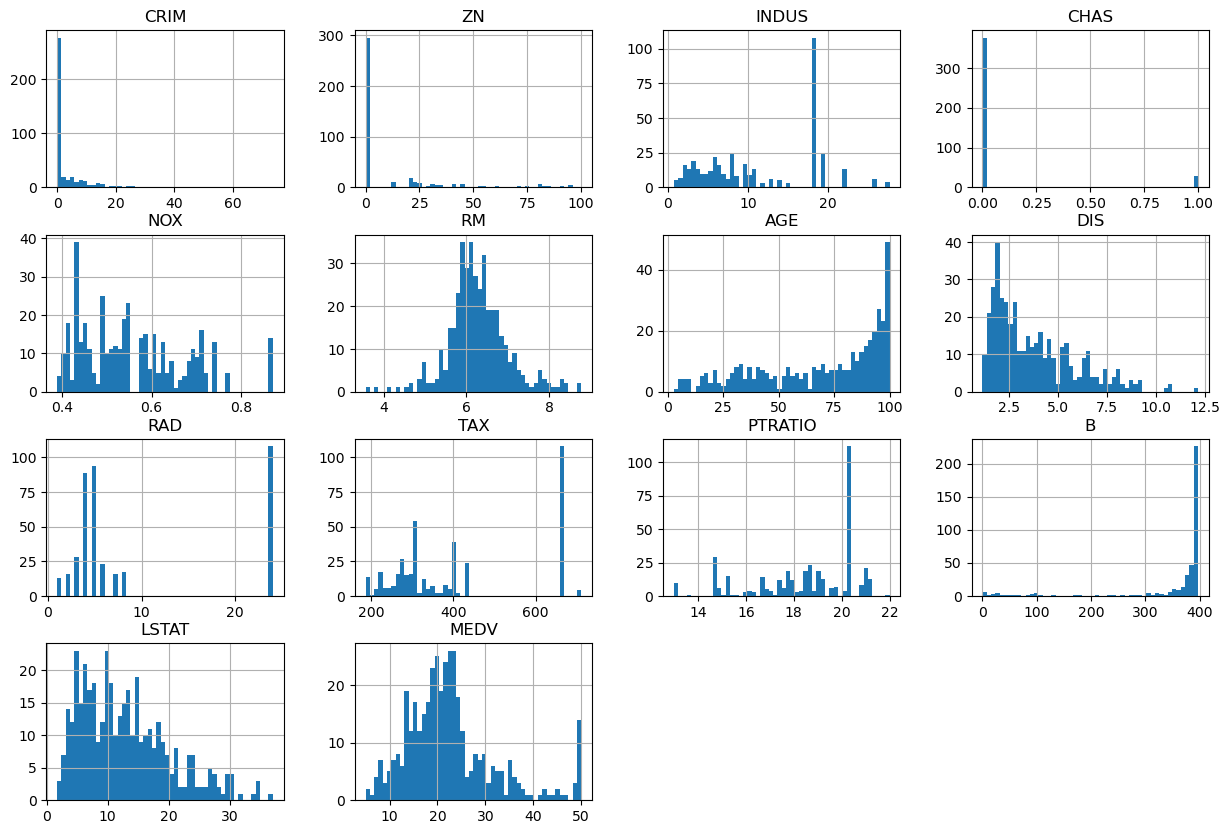

In [8]:
import matplotlib as pyplt
boston.hist(bins=50, figsize=(15,10))

So from the plot's it is far more clear that RM, AGE, DIS, LSTAT, NOX, B, PTRATIO are kind of some important featues. In the dataset, Now lets check same with the help of covarience matrix.

In [9]:
corr_matrix = boston.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

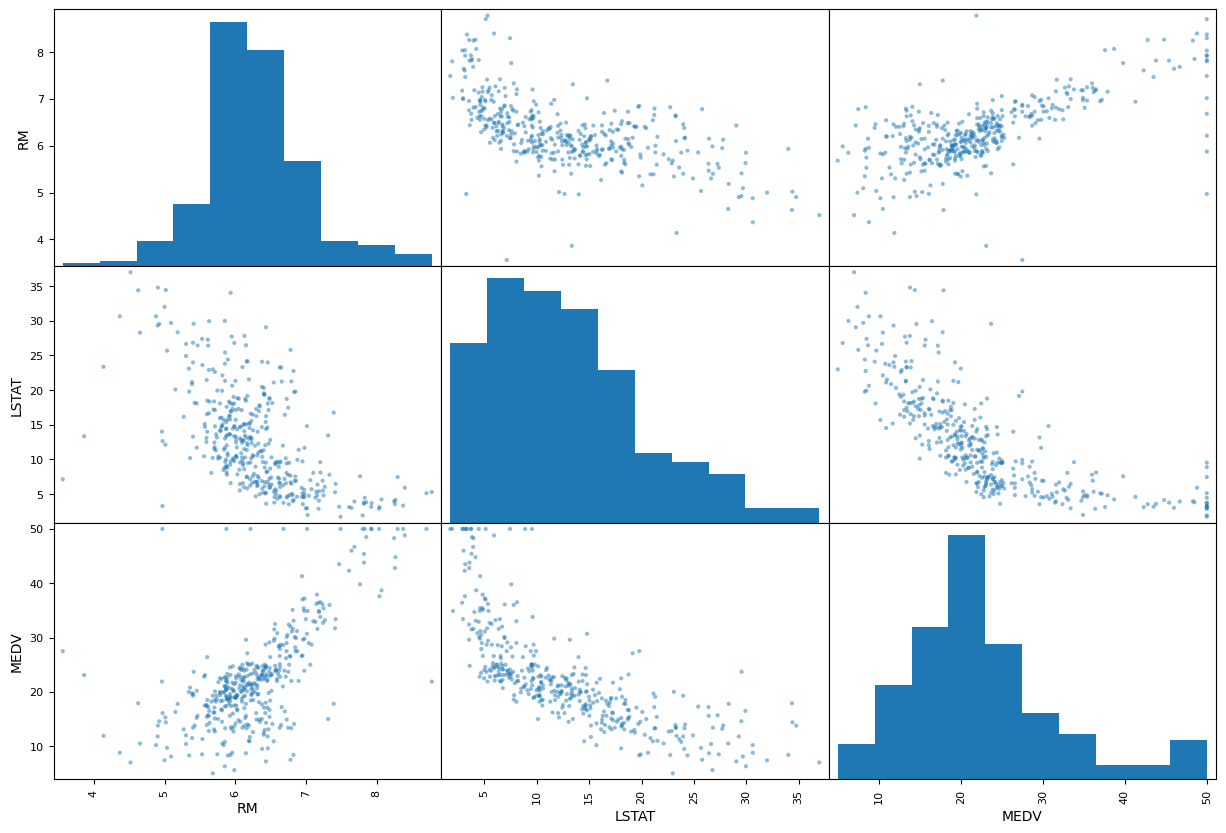

In [10]:
from pandas.plotting import scatter_matrix

attridutes = ['RM', 'LSTAT', 'MEDV']

scatter_matrix(boston[attridutes], figsize=(15,10))

So, From this data we can say that RM, LSTAT are highly correlated, which house having more number of rooms and locality having higher status of population, effects the price most, which is somewhat logically true.
Some Meaningful Insights from the data:
1. Older Hosues having lesser number of rooms
2. More will be the crime rate in lower status of population
3. Higher status polulation give more TAX for houses
4. More will be the crime rate higher will be the price
5. Mostly price depends upon LSTAT and RM

## Creating a pipeline 

So basic design of ScikitLearn is it provides three functionality:
1. Estimators ,e.g. SimpleImputer
2. Transformers ,e.g. PCA, Standardization, Normalization
3. Predictors e.g. ML Models

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

boston_data = boston.drop("MEDV", axis=1)
boston_data_labels = strat_train_set["MEDV"].copy()
my_Pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])

transformed_data = my_Pipeline.fit_transform(boston_data)

## Selecting a model for predictions 

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(transformed_data, boston_data_labels)


LinearRegression()

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, transformed_data, boston_data_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_score = np.sqrt(-scores)

In [14]:
rmse_score

array([4.21674442, 4.26026816, 5.1071608 , 3.82881892, 5.34093789,
       4.3785611 , 7.47384779, 5.48226252, 4.14885722, 6.0669122 ])

So we are getting accuracy using that model is nearly 95-96 we select this model

## Saving the model 

In [15]:
from joblib import dump,load
dump(model, "House_Predictions.joblib")

['House_Predictions.joblib']

## Test the model on test data

In [17]:
from sklearn.metrics import mean_squared_error

test_X = strat_test_set.drop("MEDV", axis=1)
test_Y = strat_test_set["MEDV"].copy()
Prepared_X_Test = my_Pipeline.transform(test_X)
final_predictions = model.predict(Prepared_X_Test)
final_mse = mean_squared_error(test_Y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.143819554319327

We are getting 95.967 percent accuracy now it's time to save the model and do some FUN :)

In [18]:
transformed_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])